# 6. přednáška - Grafika II

## Příklad 2
V tabulce jsou uvedeny počty obyvatel v Jihomoravském kraji ve věku 15 a více let podle nejvyššího ukončeného vzdělání.
|rok | celkem | základní | vyučení | střední | vysokoškolské | bez vzdělání|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1980 | 877 755 | 396 337 | 276 699 | 148 070 | 51 151 | 1 565|
| 1991 | 904 177 | 302 604 | 312 072 | 205 564 | 75 359 | 2 227|
| 2001 | 953 502 | 222 262 | 353 596 | 267 556 | 98 154 | 3 269|
| 2011 | 1 003 708 | 176 419 | 324 371 | 307 714 | 143 968 | 4 283|

Zdroj: ČSÚ

<div class="alert alert-block alert-success"> 

Nejprve načteme balíček **ggplot2**.
    
</div>

In [6]:
library(ggplot2)

<div class="alert alert-block alert-success"> 

Nejprve načteme data ze souboru **obyvatelstvoJM.csv**.
    
</div>

In [7]:
df <- read.table('obyvatelstvoJM.csv', header = TRUE, sep = ";")

In [8]:
M <- as.matrix(df[,-1])
hodnoty <- c(t(M))
barvy <- 4:9
roky <- df$rok

<div class="alert alert-block alert-success"> 

**1.** Jak vykreslit sloupcový graf absolutních hodnot?
    
</div>

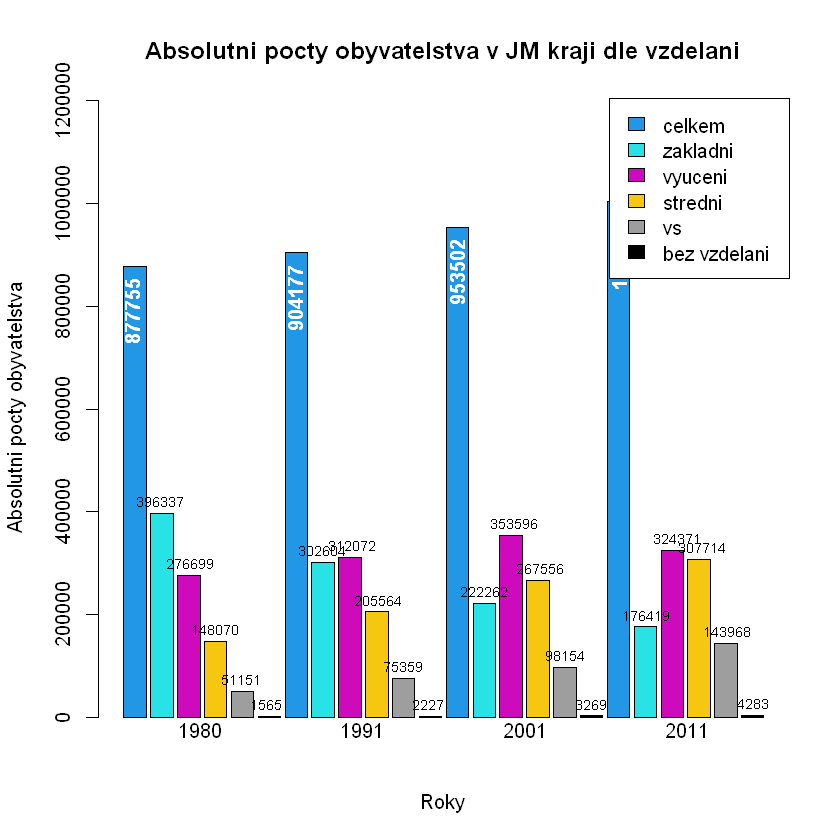

In [9]:
barplot(hodnoty , border = TRUE , col = rep(barvy, times = 4), ylim = c(0, max(df$celkem)*1.2),
        xlab = "Roky", ylab = "Absolutni pocty obyvatelstva", 
        main = "Absolutni pocty obyvatelstva v JM kraji dle vzdelani")

ixy <- (par("usr")[2] + par("usr")[1])/8
iyy <- (par("usr")[3] + par("usr")[4])/50
text(c(1,3,5,7)*ixy, par("usr")[3] - iyy, adj = 0.5, xpd = TRUE,
     labels = as.character(roky))
legend("topright", c("celkem", "zakladni", "vyuceni", "stredni", "vs", "bez vzdelani"), 
       fill = barvy)

text(c(1,3,5,7)*ixy - 3/4*ixy, df$celkem - iyy, srt = 90, adj = c(1,0), xpd = TRUE,
     labels = as.character(df$celkem), col = "white", font = 2)
text(c(1,3,5,7)*ixy - 2/4*ixy, df$zakladni + iyy, adj = 0.5,
     labels = as.character(df$zakladni), cex = 0.7)
text(c(1,3,5,7)*ixy - 1/8*ixy, df$vyuceni + iyy, adj = 0.5,
     labels = as.character(df$vyuceni), cex = 0.7)
text(c(1,3,5,7)*ixy + 3/16*ixy, df$stredni + iyy, adj = 0.5,
     labels = as.character(df$stredni), cex = 0.7)
text(c(1,3,5,7)*ixy + 2/4*ixy, df$vs + iyy, adj = 0.5,
     labels = as.character(df$vs), cex = 0.7)
text(c(1,3,5,7)*ixy + 13/16*ixy, df$bez + iyy, adj = 0.5,
     labels = as.character(df$bez), cex = 0.7)


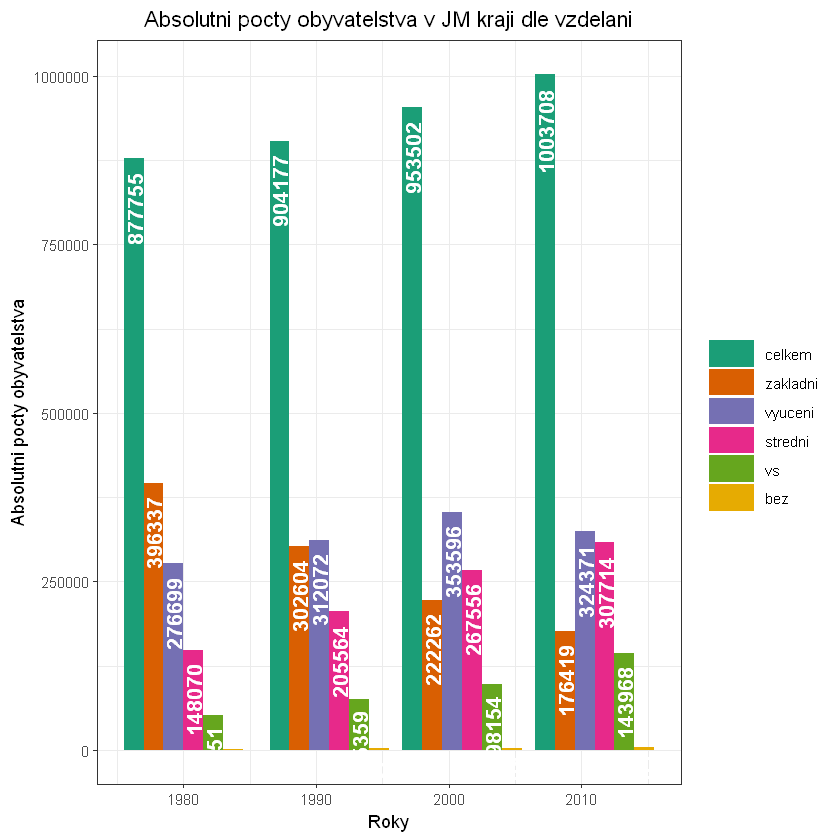

In [10]:
# ggplot
vzdelani <- factor(names(df)[-1], ordered = TRUE, levels = names(df)[-1])
dfg <- data.frame(pocet = c(t(M)), vzdelani = vzdelani, rok = rep(roky, each = 6))

p2 <- ggplot(data = dfg, 
             aes(x = rok, y = pocet, fill = vzdelani))
p2 <- p2 + geom_bar(stat = "identity", position = "dodge")
p2 <- p2 + theme_bw () + xlab("Roky") + ylab("Absolutni pocty obyvatelstva") + labs(fill = "") + 
  ggtitle("Absolutni pocty obyvatelstva v JM kraji dle vzdelani")
p2 <- p2 + theme(plot.title = element_text(hjust = 0.5))
p2 <- p2 + scale_fill_brewer(palette="Dark2")  # zmena barevne palety
p2 <- p2 + theme(legend.position.inside = c(0.92, 0.85), legend.key.width = unit(10, "mm"))
p2 <- p2 + geom_text(aes(label = pocet), vjust = 0.5, hjust = 1.2,  color = "white", angle = 90, 
                     position = position_dodge(width = 9), size = 4.5, fontface = "bold")
#nebo
# p2 <- p2 + geom_text(aes(label = pocet), vjust = - 0.5,  color = "black", 
#                      position = position_dodge(width = 9), size = 2.8)

print(p2)


<div class="alert alert-block alert-success"> 

**2.** Jak vykreslit sloupcový graf relativních hodnot?
    
</div>

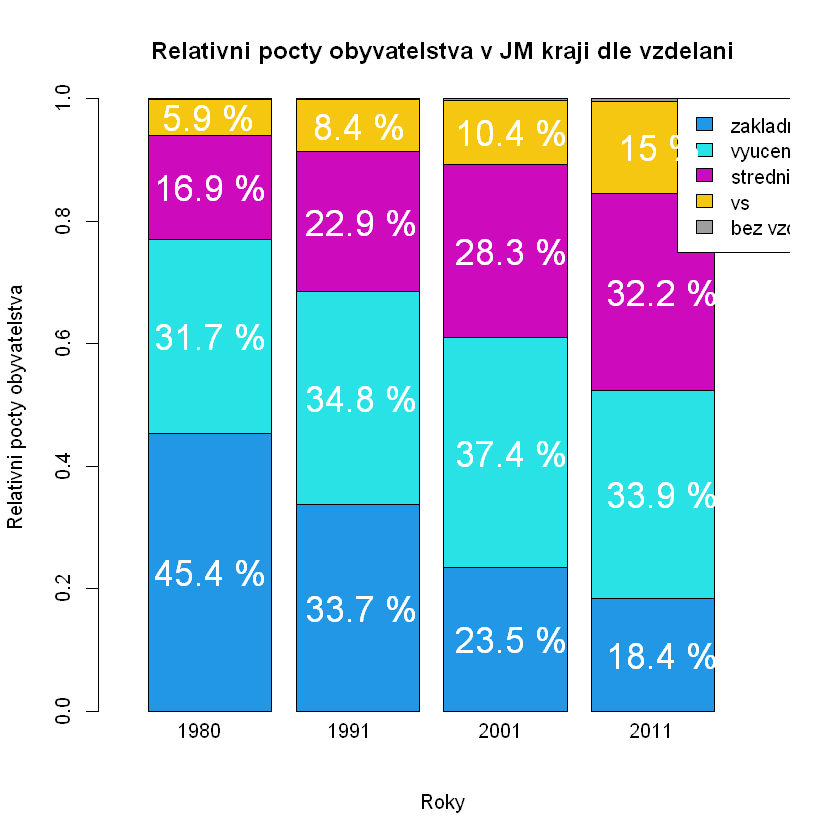

In [11]:
relativni <- M[, 2:ncol(M)]/(rowSums(M[,2:ncol(M)]) %*% t(rep(1,5)))

barplot(t(relativni) , border = TRUE , col = rep(barvy, times = 4), xlim = c(0,5.2),
        xlab = "Roky", ylab = "Relativni pocty obyvatelstva", 
        main = "Relativni pocty obyvatelstva v JM kraji dle vzdelani")

ixy <- (par("usr")[2] + par("usr")[1])/8.5
iyy <- (par("usr")[3] + par("usr")[4])/50
text(c(1,3,5,7)*ixy, par("usr")[3] - iyy, adj = 0.5, xpd = TRUE,
     labels = as.character(roky))
legend(4.5,1, c("zakladni", "vyuceni", "stredni", "vs", "bez vzdelani"), 
       fill = barvy[-6])

procenta <- round(100 * relativni[, -5], 1)

text(ixy, cumsum(relativni[1, -5])-relativni[1, -5]/2, xpd = TRUE,
     labels = paste(as.character(procenta[1, ]),"%"), col = "white", cex = 1.8, adj = 0.4)
text(3*ixy, cumsum(relativni[2, -5])-relativni[2, -5]/2, xpd = TRUE,
     labels = paste(as.character(procenta[2, ]),"%"), col = "white", cex = 1.8, adj = 0.4)
text(5*ixy, cumsum(relativni[3, -5])-relativni[3, -5]/2, xpd = TRUE,
     labels = paste(as.character(procenta[3, ]),"%"), col = "white", cex = 1.8, adj = 0.4)
text(7*ixy, cumsum(relativni[4, -5])-relativni[4, -5]/2, xpd = TRUE,
     labels = paste(as.character(procenta[4, ]),"%"), col = "white", cex = 1.8, adj = 0.4)
                

<div class="alert alert-block alert-warning"> 

Oba předchozí obrázky jsme vykreslili příkazem **bar**. Všimněte si, jak výstup tohoto příkazu závisí na parametrech.
    
</div>

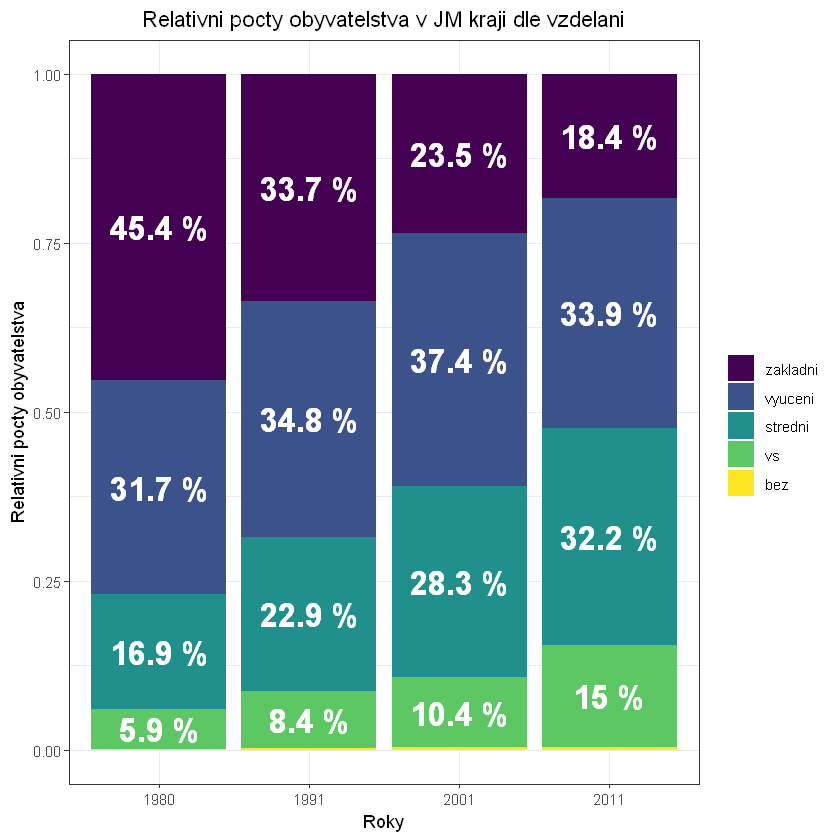

In [12]:
vzdelani <- factor(names(df)[-c(1,2)], ordered = TRUE, levels = names(df)[-c(1,2)])
dfg <- data.frame(pocet = c(t(relativni)), vzdelani = vzdelani, rok = factor(rep(roky, each = 5)))
poz <- t(apply(relativni, 1, cumsum))
dfg$pozice <- c(t(poz))
dfg$popis <- paste(round(100*dfg$pocet,1),"%")
dfg$popis[dfg$vzdelani == "bez"] <- ""

p2 <- ggplot(data = dfg, 
             aes(x = rok, y = pocet, fill = vzdelani))
p2 <- p2 + geom_bar(stat = "identity", position = "stack")
p2 <- p2 + theme_bw () + xlab("Roky") + ylab("Relativni pocty obyvatelstva") + labs(fill = "") + 
  ggtitle("Relativni pocty obyvatelstva v JM kraji dle vzdelani")
p2 <- p2 + theme(plot.title = element_text(hjust = 0.5))
# p2 <- p2 + scale_fill_brewer(palette="Dark2")  # zmena barevne palety
# p2 <- p2 + theme(legend.position = c(0.92, 0.85), legend.key.width = unit(10, "mm"))

p2 <- p2 + geom_text(aes(y = 1 - pozice + pocet/2, label = popis), vjust = 0.5, hjust = 0.5,  
                     color = "white", size = 7, fontface = "bold")
p2


<div class="alert alert-block alert-success"> 

**3.** Jak vykreslit koláč s relativními hodnotami?
    
</div>

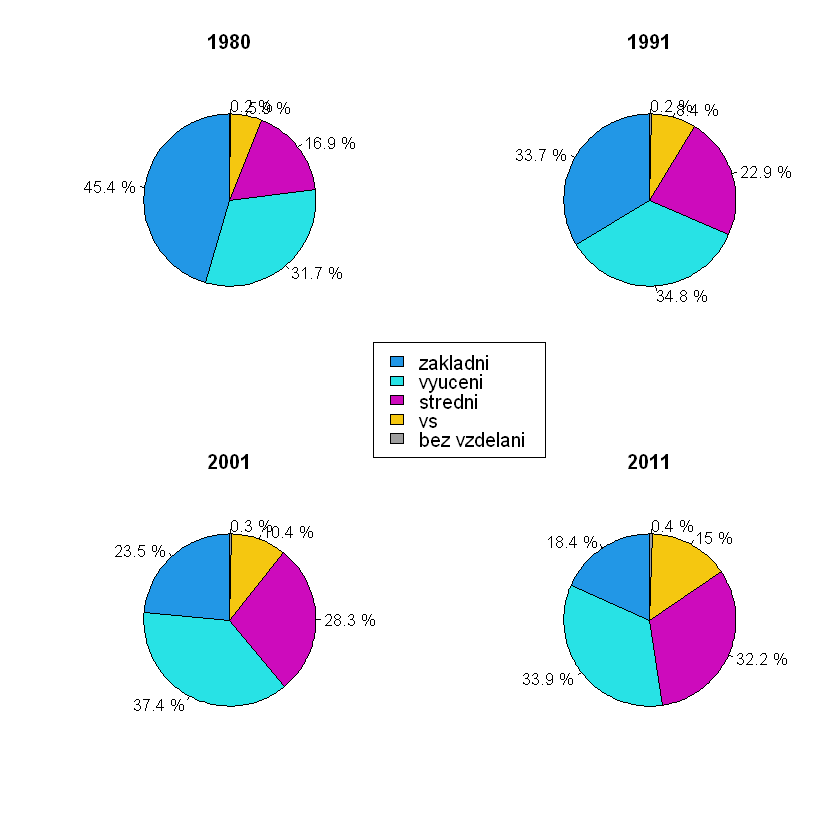

In [13]:

procenta <- round(100 * relativni, 1)
par(mfrow = c(2,2))
for (k in 1:4){
    pie(relativni[k, ], labels = paste(as.character(procenta[k, ]),"%"), col = barvy,
        main = as.character(roky[k]), init.angle = 90)
}
par(mfrow = c(1,1))
legend(x = 0, y = 0, c('zakladni', 'vyuceni', 'stredni', 'vs', 'bez vzdelani'), 
       fill = barvy, xjust = 0.5, yjust = 0.5)

<div class="alert alert-block alert-warning"> 

Při tvorbě obrázku jsme použili cyklus **for**.
    
</div>

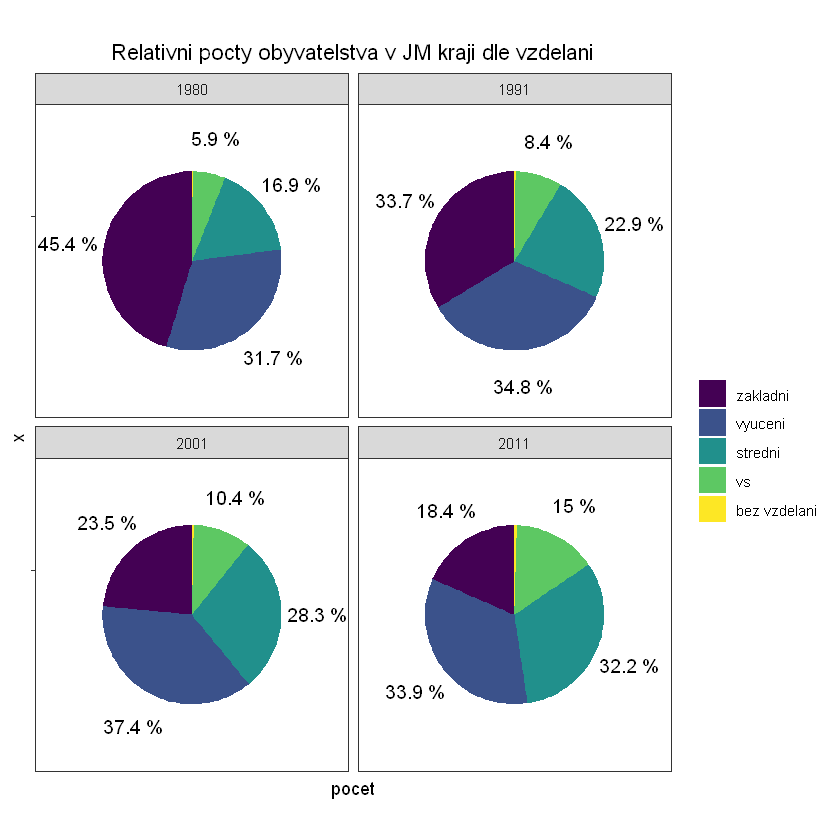

In [34]:
# ggplot
vzdelani <- factor(names(df)[-c(1,2)], ordered = TRUE, levels = names(df)[-c(1,2)])
dfg <- data.frame(pocet = c(t(relativni)), vzdelani = vzdelani, rok = rep(roky, each = 5))
poz <- apply(relativni, 1, cumsum)
dfg$pozice <- 1- c(poz) + c(t(relativni)/2)
dfg$popis <- paste(round(100*dfg$pocet,1),"%")
dfg$popis[dfg$vzdelani == "bez"] <- ""

p2 <- ggplot(data = dfg, 
             aes(x = "", y = pocet,
             fill = factor(vzdelani, 
                           labels = c('zakladni', 'vyuceni', 'stredni', 'vs', 'bez vzdelani')))) 
p2 <- p2 + geom_bar(stat = "identity", width = 2)
p2 <- p2 + coord_polar(theta = "y", start = 0)
p2 <- p2 + facet_wrap( ~ rok, ncol = 2)
p2 <- p2 + theme_bw () + labs(fill = "") + 
           ggtitle("Relativni pocty obyvatelstva v JM kraji dle vzdelani")
p2 <- p2 + theme(plot.title = element_text(hjust = 0.5))
p2 <- p2 + geom_text(aes(x = 2.8, y = pozice, label = popis), size = 4)
#p2 <- p2 + scale_fill_brewer(palette="Dark2")  # zmena barevne palety
#p2 <- p2 + theme(legend.position = c(0.92, 0.85), legend.key.width = unit(10, "mm"))
p2 <- p2 + theme(axis.text = element_blank(), 
                 panel.grid  = element_blank())
p2
